<a href="https://colab.research.google.com/github/mikealfaro24/Data201_project1/blob/main/Data201_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
## By Mike and Yasmin


### In this project, we will examine different types of crime commited in Montgomery County. The source for this dataset can be found https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3


The data found in this dataset is provided by “EJustice”, a respected law enforcement records-management system used by the Montgomery County Police Department. It is important to mention that names and other private information is not included for safety and privacy reasons.


This dataset consists of 279k rows and 39 columns. Some columns included are Incident ID, Start_Date_Time, End_Date_Time, Victims, Location, and Police District to name a few. Another important column is the crime column which is broken down into 2 other columns that further explain the crime committed.


As Montgomery County Residents it is important to stay up to date with the level of crime committed across the county. Some questions of interest include which city in Montgomery County has the most reported crime? What is the most common type of crime committed? What time are crimes most likely to occur?
All this with the hopes of being more aware of the level of crime in the county and to develop solutions to lower crime rates.






### Loading data and EDA

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Crime_20231101.csv to Crime_20231101.csv


In [4]:
import pandas as pd
import io
montgomery_data= pd.read_csv(io.BytesIO(uploaded['Crime_20231101.csv']))
montgomery_data.head()

<ipython-input-4-2c6920af38fb>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  montgomery_data= pd.read_csv(io.BytesIO(uploaded['Crime_20231101.csv']))


,Incident ID,Offence Code,CR Number,Dispatch Date / Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,...,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
0,201166610,2308,170548599,NaN,12/14/2017 04:30:00 PM,NaN,23D,1,Crime Against Property,Theft from Building,...,270,1700.0,E,JEFFERSON,NaN,ST,39.05848,-77.1264,1D,"(39.0585, -77.1264)"
1,201359823,5404,220000965,01/09/2022 01:18:38 AM,01/09/2022 01:34:00 AM,NaN,90D,1,Crime Against Society,Driving Under the Influence,...,428,100.0,N,FREDERICK,NaN,AVE,39.09438,-77.1517,6D,"(39.0944, -77.1517)"
2,201400721,5404,220021588,05/20/2022 07:02:47 PM,05/20/2022 07:02:00 PM,NaN,90D,1,Crime Against Society,Driving Under the Influence,...,231,NaN,NaN,RIVER,NaN,RD,39.12312,-77.4934,2D,"(39.1231, -77.4934)"
3,201127168,3582,17014976,NaN,03/23/2017 11:33:00 PM,NaN,35A,1,Crime Against Society,Drug/Narcotic Violations,...,168,10100.0,NaN,GEORGIA,NaN,AVE,39.02053,-77.0444,3D,"(39.0205, -77.0444)"
4,201095140,2303,16043118,NaN,08/24/2016 09:47:00 PM,NaN,23C,1,Crime Against Property,Shoplifting,...,271,5700.0,NaN,BOU,NaN,AVE,39.05597,-77.1136,1D,"(39.056, -77.1136)"


In [5]:
print(montgomery_data.shape)
print(montgomery_data.columns)

(279014, 30)
Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'Start_Date_Time', 'End_Date_Time', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place',
       'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')


In [6]:
print(montgomery_data.isna().sum())
# shows how man NA are in each column

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       40507
Start_Date_Time                0
End_Date_Time             139473
NIBRS Code                     0
Victims                        0
Crime Name1                    0
Crime Name2                    0
Crime Name3                    0
Police District Name         474
Block Address              26716
City                          13
State                       5155
Zip Code                    2394
Agency                         0
Place                          0
Sector                         0
Beat                           0
PRA                            6
Address Number             26618
Street Prefix             266500
Street Name                  475
Street Suffix             274371
Street Type                  782
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

In [7]:
# List of columns to delete
delete = ['Offence Code', 'CR Number', 'End_Date_Time', 'NIBRS Code', 'Sector', 'Beat', 'PRA', 'Block Address', 'State', 'Zip Code', 'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type', 'Location']

# Filter and remove only the columns that exist in the DataFrame
existing_columns = [col for col in delete if col in montgomery_data.columns]
montgomery_data.drop(columns=existing_columns, inplace=True)

# Printing the DataFrame after removing columns
print(montgomery_data.head())
print(montgomery_data.shape)
print(montgomery_data.columns)



   Incident ID    Dispatch Date / Time         Start_Date_Time  Victims  \
0    201166610                     NaN  12/14/2017 04:30:00 PM        1   
1    201359823  01/09/2022 01:18:38 AM  01/09/2022 01:34:00 AM        1   
2    201400721  05/20/2022 07:02:47 PM  05/20/2022 07:02:00 PM        1   
3    201127168                     NaN  03/23/2017 11:33:00 PM        1   
4    201095140                     NaN  08/24/2016 09:47:00 PM        1   

              Crime Name1                  Crime Name2  \
0  Crime Against Property          Theft from Building   
1   Crime Against Society  Driving Under the Influence   
2   Crime Against Society  Driving Under the Influence   
3   Crime Against Society     Drug/Narcotic Violations   
4  Crime Against Property                  Shoplifting   

                          Crime Name3 Police District Name           City  \
0                 LARCENY - FROM BLDG            ROCKVILLE      ROCKVILLE   
1  DRIVING UNDER THE INFLUENCE LIQUOR   MONTGO

In [8]:
montgomery_data['City'].value_counts()
print(montgomery_data['City'].unique)
# Shows which city has the most cases

<bound method Series.unique of 0             ROCKVILLE
1          GAITHERSBURG
2               POTOMAC
3         SILVER SPRING
4             ROCKVILLE
              ...      
279009        ROCKVILLE
279010       GERMANTOWN
279011     GAITHERSBURG
279012       CLARKSBURG
279013        ROCKVILLE
Name: City, Length: 279014, dtype: object>


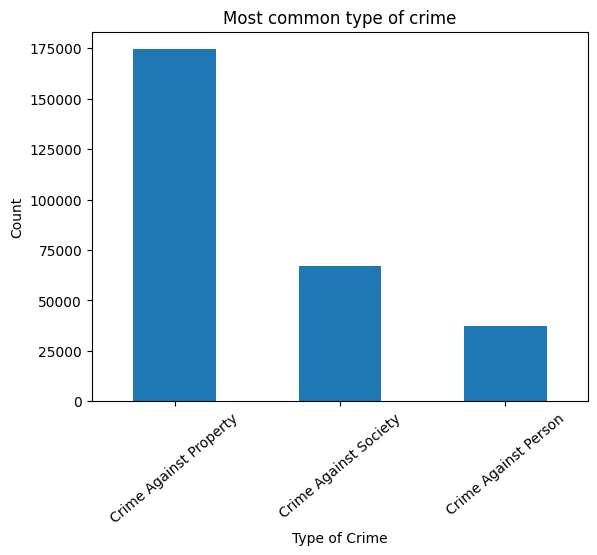

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
ctcounts = montgomery_data['Crime Name1'].value_counts()
ctcounts.plot(kind='bar')
plt.xlabel('Type of Crime')
plt.ylabel('Count')
plt.title('Most common type of crime')
plt.xticks(rotation=40)
plt.show()

In [ ]:
sns.barplot(x='City', y='Count', data=city_table)
plt.title('Crime Count by City')
plt.xticks(rotation=90)
plt.show()

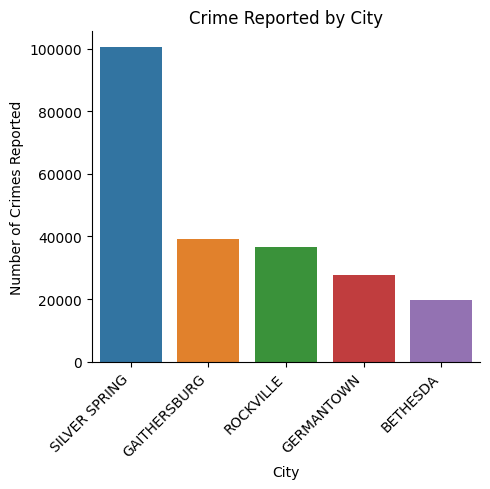

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

city_list = ["SILVER SPRING", "GAITHERSBURG", "ROCKVILLE", "GERMANTOWN", "BETHESDA"]
sns.catplot(data=montgomery_data, x='City', kind="count", order=city_list)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.xlabel('City')
plt.ylabel('Number of Crimes Reported')
plt.title('Crime Reported by City')
plt.tight_layout()
plt.show()

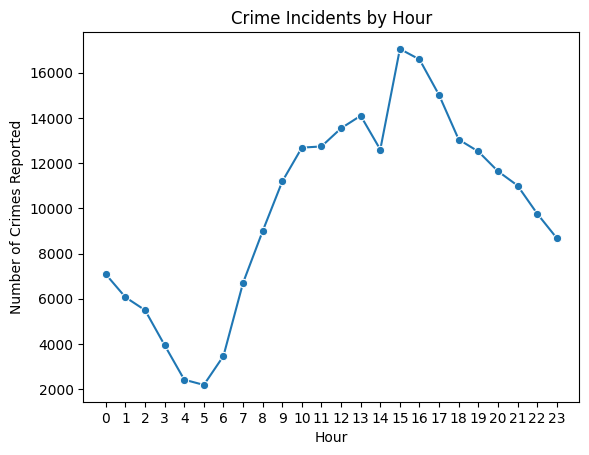

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the hour from the 'Dispatch Date / Time' column
montgomery_data['Hour'] = pd.to_datetime(montgomery_data['Dispatch Date / Time']).dt.hour

# Count the number of crimes for each hour
hourly_crime_counts = montgomery_data['Hour'].value_counts().sort_index()

# Plotting the data using seaborn
sns.lineplot(x=hourly_crime_counts.index, y=hourly_crime_counts.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Reported')
plt.title('Crime Incidents by Hour')
plt.xticks(range(24))  # Show all hours on the x-axis

# Display the plot
plt.show()

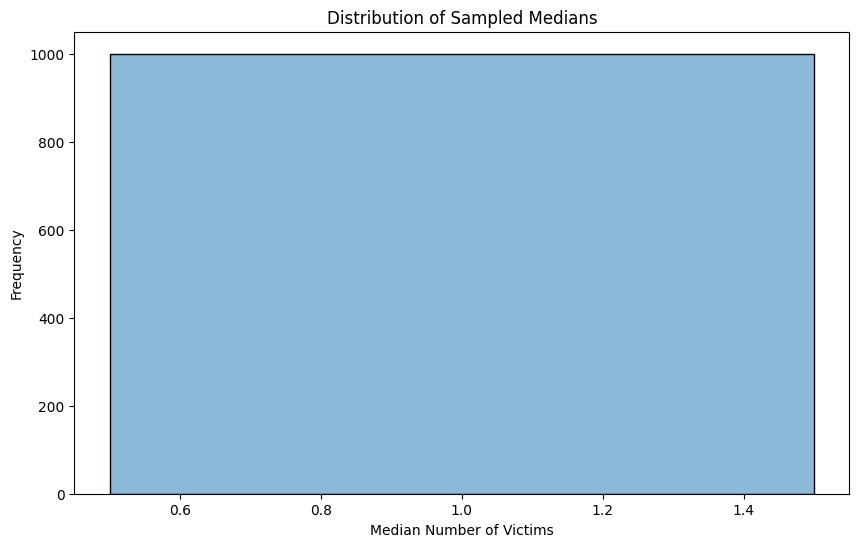

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define the quantitative variable of interest (e.g., 'Victims')
quantitative_variable = 'Victims'

# Number of simulations for median estimation
num_simulations = 1000

# Sample size for each simulation (10% of the data)
sample_size = int(0.10 * len(montgomery_data))

# Initialize a list to store the sampled medians
sampled_medians = []

# Perform simulations
for _ in range(num_simulations):
    # Randomly sample from the dataset
    sample = montgomery_data.sample(n=sample_size)
    # Calculate the median for the sampled data
    median = sample[quantitative_variable].median()
    sampled_medians.append(median)

# 1. Plot the distribution of sampled medians
plt.figure(figsize=(10, 6))
sns.histplot(sampled_medians, kde=True)
plt.title("Distribution of Sampled Medians")
plt.xlabel("Median Number of Victims")
plt.ylabel("Frequency")
plt.show()



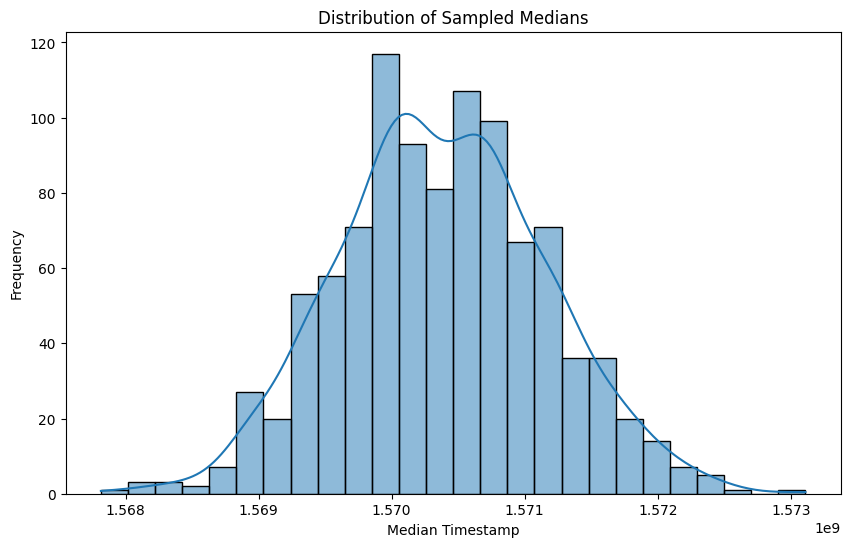

In [ ]:
import pandas as pd
import numpy as np




montgomery_data['Timestamp'] = pd.to_datetime(montgomery_data['Dispatch Date / Time']).astype(int) / 10**9

# Number of simulations for median estimation
num_simulations = 1000

# Sample size for each simulation (10% of the data)
sample_size = int(0.10 * len(montgomery_data))

# Initialize a list to store the sampled medians
sampled_medians = []

# Set the random seed for reproducibility
np.random.seed(42)

# Perform simulations
for _ in range(num_simulations):
    # Randomly sample from the dataset
    sample = montgomery_data.sample(n=sample_size)
    # Calculate the median for the sampled data
    median = sample['Timestamp'].median()
    sampled_medians.append(median)


# Example: Plot the distribution of sampled medians
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(sampled_medians, kde=True)
plt.title("Distribution of Sampled Medians")
plt.xlabel("Median Timestamp")
plt.ylabel("Frequency")
plt.show()
